In [121]:
import pandas as pd
import seaborn as sns

In [122]:
df = pd.read_csv('/Users/rachyc/Downloads/midterm_data.csv')

In [123]:
df

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4
...,...,...,...,...,...,...,...,...,...,...
4995,4996,48,8,45.000000,11,25,278.92,0,Tablet,Location 5
4996,4997,31,4,44.700747,9,12,78.97,0,Tablet,Location 2
4997,4998,34,5,27.146624,7,19,139.42,1,Desktop,Location 4
4998,4999,58,1,45.000000,11,24,203.42,0,Desktop,Location 5


In [124]:
df.describe(include='all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4900,4970
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2538,1056
mean,2500.500000,41.538200,5.027200,25.158496,5.774400,14.966400,149.443146,0.272400,NaN,NaN
std,1443.520003,14.042734,2.594958,9.825536,2.570842,6.046336,68.711683,0.445239,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1250.750000,29.000000,3.000000,18.268862,4.000000,10.000000,92.482500,0.000000,NaN,NaN
50%,2500.500000,42.000000,5.000000,25.035361,6.000000,15.000000,143.440000,0.000000,NaN,NaN
75%,3750.250000,54.000000,7.000000,32.000361,8.000000,20.000000,198.380000,1.000000,NaN,NaN


In [125]:
df[df['time_spent'].isnull() & df['cart_value'].isnull() & df['checkout_status'].isnull() & df['location'].isnull()]

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location


In [126]:
df[df['device'].isnull() & df['location'].isnull()]

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
2130,2131,20,5,21.841304,6,19,243.39,0,NaN,NaN


In [127]:
df.drop([2130], axis=0, inplace=True)

In [128]:
df_test = df.copy()

In [129]:
df_test.groupby('device').describe()

userID                                                            
          count         mean          std  min      25%     50%      75%   
device                                                                     
Desktop  2538.0  2481.464933  1435.264432  1.0  1260.25  2497.5  3733.75  \
Mobile   1428.0  2518.448880  1457.420581  7.0  1236.75  2512.5  3807.75   
Tablet    934.0  2534.595289  1452.234322  5.0  1271.25  2513.0  3753.25   

                    age             ... cart_value         checkout_status   
            max   count       mean  ...        75%     max           count   
device                              ...                                      
Desktop  4999.0  2538.0  41.338849  ...   197.2450  427.40          2538.0  \
Mobile   4991.0  1428.0  41.724790  ...   201.6100  387.98          1428.0   
Tablet   5000.0   934.0  41.844754  ...   197.7025  377.98           934.0   

                                                      
             mean       std  min  25%  50%  75%  max  
device                                                
Desktop  0.285264  0.451629  0.0  0.0  0.0  1.0  1.0  
Mobile   0.264706  0.441331  0.0  0.0  0.0  1.0  1.0  
Tablet   0.254818  0.435992  0.0  0.0  0.0  1.0  1.0  

[3 rows x 64 columns]

In [130]:
df_test['device'] = df_test['device'].fillna('Other')

In [131]:
df_test.groupby('device').describe()


userID                                                             
          count         mean          std   min      25%     50%      75%   
device                                                                      
Desktop  2538.0  2481.464933  1435.264432   1.0  1260.25  2497.5  3733.75  \
Mobile   1428.0  2518.448880  1457.420581   7.0  1236.75  2512.5  3807.75   
Other      99.0  2411.656566  1386.399927  80.0  1226.00  2379.0  3541.50   
Tablet    934.0  2534.595289  1452.234322   5.0  1271.25  2513.0  3753.25   

                    age             ... cart_value         checkout_status   
            max   count       mean  ...        75%     max           count   
device                              ...                                      
Desktop  4999.0  2538.0  41.338849  ...   197.2450  427.40          2538.0  \
Mobile   4991.0  1428.0  41.724790  ...   201.6100  387.98          1428.0   
Other    4988.0    99.0  41.282828  ...   191.7000  302.48            99.0   
Tablet   5000.0   934.0  41.844754  ...   197.7025  377.98           934.0   

                                                      
             mean       std  min  25%  50%  75%  max  
device                                                
Desktop  0.285264  0.451629  0.0  0.0  0.0  1.0  1.0  
Mobile   0.264706  0.441331  0.0  0.0  0.0  1.0  1.0  
Other    0.222222  0.417855  0.0  0.0  0.0  0.0  1.0  
Tablet   0.254818  0.435992  0.0  0.0  0.0  1.0  1.0  

[4 rows x 64 columns]

In [132]:
df_test.groupby('location').describe()


userID                                                           
             count         mean          std  min      25%     50%     75%   
location                                                                     
Location 1   979.0  2428.888662  1460.439111  1.0  1115.00  2431.0  3683.5  \
Location 2   950.0  2495.070526  1413.792983  4.0  1335.50  2517.0  3674.0   
Location 3  1014.0  2477.388560  1437.144060  2.0  1248.25  2378.5  3712.5   
Location 4  1056.0  2508.631629  1470.328379  3.0  1219.50  2517.5  3796.0   
Location 5   971.0  2598.049434  1434.875326  6.0  1352.50  2664.0  3849.0   

                       age             ... cart_value         checkout_status   
               max   count       mean  ...        75%     max           count   
location                               ...                                      
Location 1  4995.0   979.0  42.291113  ...   199.9500  394.77           979.0  \
Location 2  4997.0   950.0  41.648421  ...   198.9475  357.77           950.0   
Location 3  5000.0  1014.0  41.763314  ...   195.4400  427.40          1014.0   
Location 4  4998.0  1056.0  40.892992  ...   199.5425  353.80          1056.0   
Location 5  4999.0   971.0  41.085479  ...   197.7800  359.00           971.0   

                                                         
                mean       std  min  25%  50%  75%  max  
location                                                 
Location 1  0.282942  0.450659  0.0  0.0  0.0  1.0  1.0  
Location 2  0.266316  0.442264  0.0  0.0  0.0  1.0  1.0  
Location 3  0.261341  0.439582  0.0  0.0  0.0  1.0  1.0  
Location 4  0.284091  0.451194  0.0  0.0  0.0  1.0  1.0  
Location 5  0.266735  0.442481  0.0  0.0  0.0  1.0  1.0  

[5 rows x 64 columns]

In [133]:
df_test['location'] = df_test['location'].fillna('Other')


In [134]:
df_test.groupby('location').describe()


userID                                                            
             count         mean          std   min      25%     50%     75%   
location                                                                      
Location 1   979.0  2428.888662  1460.439111   1.0  1115.00  2431.0  3683.5  \
Location 2   950.0  2495.070526  1413.792983   4.0  1335.50  2517.0  3674.0   
Location 3  1014.0  2477.388560  1437.144060   2.0  1248.25  2378.5  3712.5   
Location 4  1056.0  2508.631629  1470.328379   3.0  1219.50  2517.5  3796.0   
Location 5   971.0  2598.049434  1434.875326   6.0  1352.50  2664.0  3849.0   
Other         29.0  2354.379310  1310.371523  60.0  1460.00  2352.0  3325.0   

                       age             ... cart_value         checkout_status   
               max   count       mean  ...        75%     max           count   
location                               ...                                      
Location 1  4995.0   979.0  42.291113  ...   199.9500  394.77           979.0  \
Location 2  4997.0   950.0  41.648421  ...   198.9475  357.77           950.0   
Location 3  5000.0  1014.0  41.763314  ...   195.4400  427.40          1014.0   
Location 4  4998.0  1056.0  40.892992  ...   199.5425  353.80          1056.0   
Location 5  4999.0   971.0  41.085479  ...   197.7800  359.00           971.0   
Other       4951.0    29.0  44.034483  ...   195.4400  237.64            29.0   

                                                         
                mean       std  min  25%  50%  75%  max  
location                                                 
Location 1  0.282942  0.450659  0.0  0.0  0.0  1.0  1.0  
Location 2  0.266316  0.442264  0.0  0.0  0.0  1.0  1.0  
Location 3  0.261341  0.439582  0.0  0.0  0.0  1.0  1.0  
Location 4  0.284091  0.451194  0.0  0.0  0.0  1.0  1.0  
Location 5  0.266735  0.442481  0.0  0.0  0.0  1.0  1.0  
Other       0.275862  0.454859  0.0  0.0  0.0  1.0  1.0  

[6 rows x 64 columns]

In [135]:
#I will use "other" to fill the missing data in device and location since the data does not change a lot.

In [136]:
df['device'] = df['device'].fillna('Other')

In [137]:
df['location'] = df['location'].fillna('location')

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4999 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4999 non-null   int64  
 1   age              4999 non-null   int64  
 2   sessions         4999 non-null   int64  
 3   time_spent       4999 non-null   float64
 4   pages_visited    4999 non-null   int64  
 5   cart_items       4999 non-null   int64  
 6   cart_value       4999 non-null   float64
 7   checkout_status  4999 non-null   int64  
 8   device           4999 non-null   object 
 9   location         4999 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 429.6+ KB


<Axes: xlabel='time_spent', ylabel='Count'>

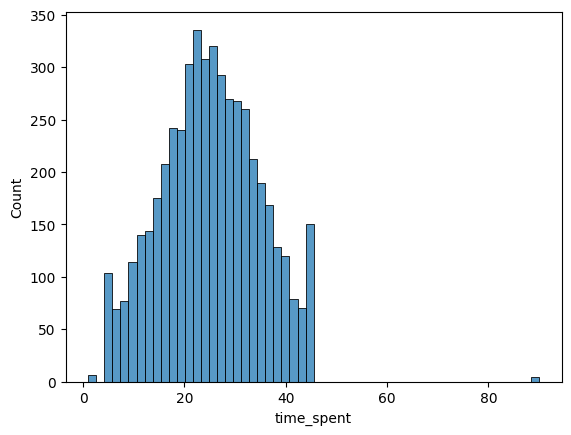

In [139]:
sns.histplot(df['time_spent'])

In [140]:
drop_time_outliers = df[df['time_spent']>60].index

In [141]:
df.drop(drop_time_outliers, inplace=True)

<Axes: xlabel='cart_value', ylabel='Count'>

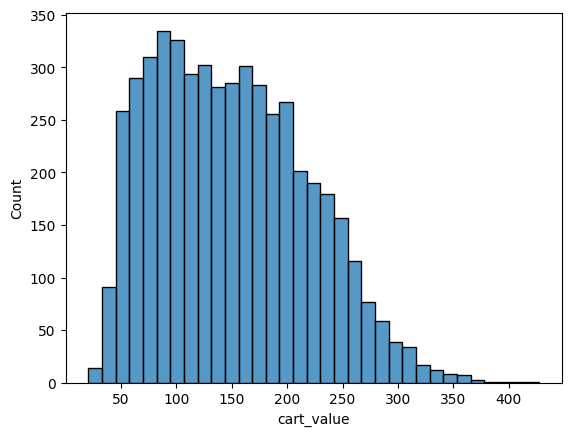

In [142]:
sns.histplot(df['cart_value'])

In [143]:
drop_cart_value_outliers = df[df['cart_value']>370].index

In [144]:
df.drop(drop_cart_value_outliers, inplace=True)

<Axes: xlabel='pages_visited', ylabel='Count'>

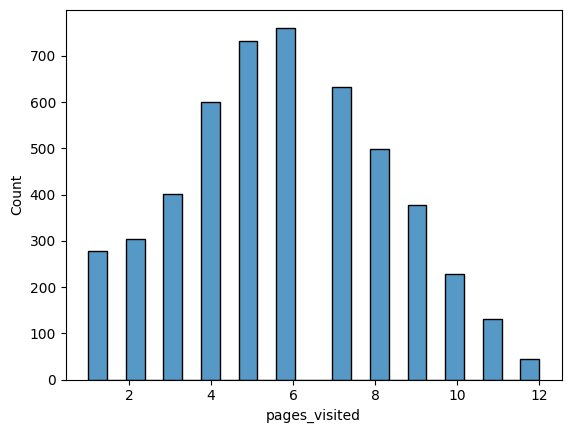

In [145]:
sns.histplot(df['pages_visited'])

In [146]:
df.drop_duplicates(inplace=True)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4989 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4989 non-null   int64  
 1   age              4989 non-null   int64  
 2   sessions         4989 non-null   int64  
 3   time_spent       4989 non-null   float64
 4   pages_visited    4989 non-null   int64  
 5   cart_items       4989 non-null   int64  
 6   cart_value       4989 non-null   float64
 7   checkout_status  4989 non-null   int64  
 8   device           4989 non-null   object 
 9   location         4989 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 428.7+ KB


<Axes: xlabel='location', ylabel='cart_value'>

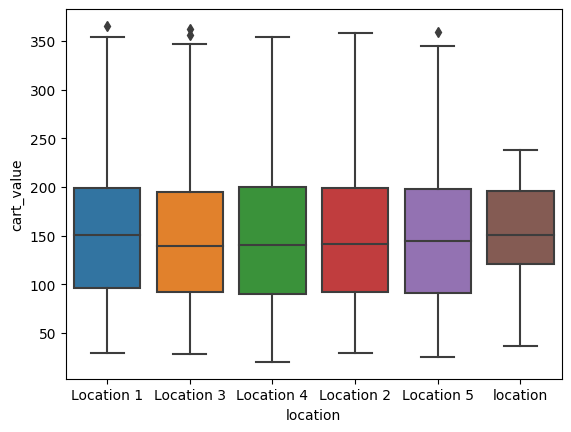

In [148]:
sns.boxplot(data = df.reset_index(),x='location',y='cart_value')

In [149]:
df.groupby(['location'])['checkout_status'].mean().to_frame().sort_values('checkout_status')

,checkout_status
location,
Location 3,0.262376
Location 2,0.266316
Location 5,0.266735
location,0.275862
Location 1,0.284103
Location 4,0.284630


In [150]:
df.groupby(['age'])['checkout_status'].mean().to_frame().sort_values('checkout_status')

,checkout_status
age,
52,0.163462
44,0.191489
53,0.195876
64,0.211538
43,0.226415
39,0.227723
31,0.232323
34,0.237288
24,0.240741


In [151]:
df.groupby(['device'])['checkout_status'].mean().to_frame().sort_values('checkout_status')

,checkout_status
device,
Other,0.222222
Tablet,0.255091
Mobile,0.264891
Desktop,0.286166


In [152]:
df.groupby(['cart_items'])['checkout_status'].mean().to_frame().sort_values('checkout_status')

,checkout_status
cart_items,
5,0.000000
23,0.000000
22,0.000000
21,0.000000
24,0.000000
25,0.000000
7,0.000000
6,0.000000
8,0.375000


In [153]:
df.groupby('cart_items')['checkout_status'].aggregate(['min','max','mean'])

,min,max,mean
cart_items,,,
5,0,0,0.000000
6,0,0,0.000000
7,0,0,0.000000
8,0,1,0.375000
9,0,1,0.457143
10,0,1,0.408730
11,0,1,0.466960
12,0,1,0.415584
13,0,1,0.426357


In [154]:
df.groupby(['time_spent'])['checkout_status'].mean().to_frame().sort_values('checkout_status')

,checkout_status
time_spent,
1.000000,0.0
24.339674,0.0
24.341320,0.0
24.341849,0.0
24.352889,0.0
...,...
30.288072,1.0
30.286484,1.0
30.270429,1.0


In [155]:
df.groupby(['location','device'])['checkout_status'].mean().to_frame().sort_values('checkout_status')

,,checkout_status
location,device,
location,Tablet,0.000000
Location 3,Other,0.000000
Location 5,Other,0.142857
Location 2,Other,0.214286
Location 4,Tablet,0.235000
Location 3,Mobile,0.239700
Location 5,Mobile,0.241135
location,Desktop,0.250000
Location 3,Tablet,0.253886


In [157]:
df.groupby(['age','time_spent'])['checkout_status'].mean().to_frame().sort_values('checkout_status')

checkout_status
age time_spent                 
18  5.000000                0.0
47  22.133195               0.0
    22.357037               0.0
    22.366429               0.0
    22.678776               0.0
...                         ...
25  30.824042               1.0
    31.133762               1.0
    31.141895               1.0
54  31.133929               1.0
52  28.169061               1.0

[4874 rows x 1 columns]

1) Based on your analysis, what can you conclude about the behaviour or characteristics of users who complete check out vs those who do not?

Based on my data analysis above, I can conclude that for location, location 4 has the highest check out values. In terms of age, the younger age around 20s has the highest check out values. In terms of device, desktop is the top choice for people to make the check out. Also, the longer time spent has the highest value of checking out items, which makes sense since the longer you spend time browsing an item, the more likely you are going to purchase the item. Moreover, the middle number of items in the cart are the most likely to be checked out, which also makes sense that people who have not too little and not too many items in their cart, are more likely to check out their cart.

2) How did you prepare your data for analysis? Describe your data cleaning and preparation approaches, and why these were the best choices.

Firstly, I use describe() to see the overall information of the data. Then I wanted to know if there are any rows that are missing all the important data, such as time spent, cart value, location, check out status. The result truns out none. Then I checked if we have any rows missing both location and device data(since they are categorical columns) There is one row missing both location and device data, then I drop the row. Then I make a copy of the dataframe to see if I fill the missing data in the categorical columns (location and device) with "other", will it impact the results drastically. It turns out it is not. Thus, I filled location and device with "other". After I check the data again, I noticed that all the values are the same, which means location and device are the only colmuns that missing datas. Then I use some data visualization tools to look for the outliers. I dropped the outliers. I then dropped the duplicates. 
In order to analyze why people check out sometimes, I conducted groupby() to compare the values between one variable and checkout_status values. 

3) What recommendations do you have for the product team? What should they do next? Be specific (i.e., who should they target, why and how).

I would make some recommendations to the product team. Firstly, the company can produce some beauty and fashion products for the older age target such as wrinkles cream. We can see from the data that some mid age people spend a long time browsing but seldom buy it. We can assume that they maybe cannot find the appropriate products for their age. Secondly, the company can improve the mobile customer experience, in order to increase the check-out values on mobile devices.  Moreover, the company can offer some discounts for customers who have more items in their cart and proceed with the checkout. For locations such as 2,3 , the company can have more advertisements in those areas.